## KNN ALGORITHM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv('iris.csv')
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report')
print(classification_report(y_test,y_pred))

confusion matrix
[[11  0  0]
 [ 0  7  1]
 [ 0  2  9]]
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.90      0.90      0.90        30



## DERIVATION TREE - ID3 ALGO

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.csv')
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

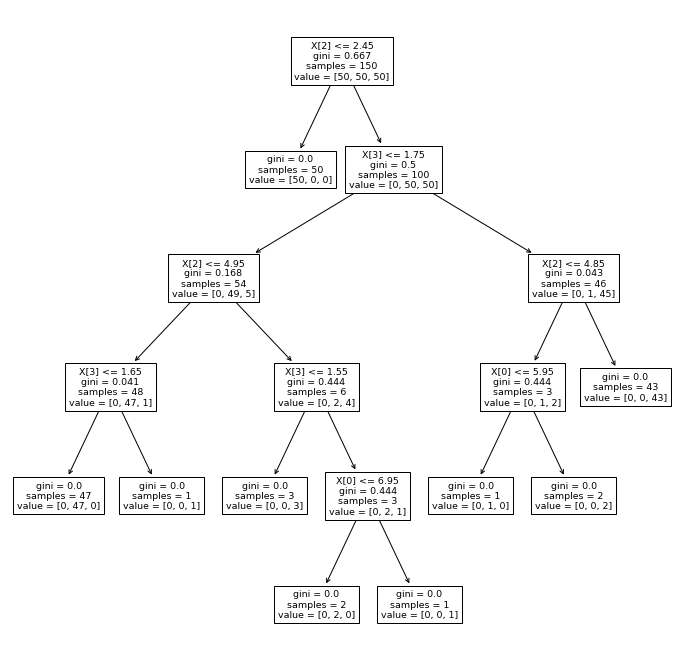

In [36]:
plt.figure(figsize=(12,12))
tree.plot_tree(model)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred = model.predict(X)
y_test = y
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy :  1.0
Confusion Matrix
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## ENSEMBLE CLASSIFIERS

## 1) ADA BOOST CLASSIFIER

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

data = pd.read_csv('iris.csv')

X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

seed = 15
num_trees = 20

model = AdaBoostClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.9


## 2) BAGGING CLASSIFIER

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris.csv')

X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9333333333333333


  ## MULTI LAYER PERCEPTRON CLASSIFIER

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = MLPClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9333333333333333


D:\program files\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
